In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv("C:\\Users\\Nehal\\Downloads\\Test.csv")

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [4]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,A


In [5]:
df.shape

(2627, 11)

In [6]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [7]:
df.size

28897

In [8]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [10]:
df['Work_Experience'] = df['Work_Experience'].fillna(df['Work_Experience'].mean())

In [11]:
df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].mean())

In [12]:
df.isnull().sum()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
Segmentation        0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(2488, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2488 non-null   int64  
 1   Gender           2488 non-null   object 
 2   Ever_Married     2488 non-null   object 
 3   Age              2488 non-null   int64  
 4   Graduated        2488 non-null   object 
 5   Profession       2488 non-null   object 
 6   Work_Experience  2488 non-null   float64
 7   Spending_Score   2488 non-null   object 
 8   Family_Size      2488 non-null   float64
 9   Var_1            2488 non-null   object 
 10  Segmentation     2488 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 233.2+ KB


In [16]:
cat_atr= ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
num_atr= ['ID', 'Age', 'Work_Experience', 'Family_Size']

In [17]:
df.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.015398,-0.023126,0.010832
Age,-0.015398,1.000000,-0.175702,-0.280862
Work_Experience,-0.023126,-0.175702,1.000000,-0.069800
Family_Size,0.010832,-0.280862,-0.069800,1.000000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
X= df.drop(['Segmentation'], axis=1)
y= df['Segmentation']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
X.shape

(2488, 10)

In [23]:
y.shape

(2488,)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
X_train[cat_atr].head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
1047,Male,No,Yes,Artist,Low,Cat_6
1910,Male,No,No,Healthcare,Low,Cat_6
1201,Male,No,No,Doctor,Low,Cat_6
780,Male,No,Yes,Healthcare,Low,Cat_6
2453,Male,No,No,Engineer,Low,Cat_6


In [26]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-0.34580858, -0.76787767, -0.79740092,  1.47570348],
       [ 0.79951309, -1.35510206, -0.48431941,  0.81108906],
       [-0.1419512 , -1.1202123 , -0.79740092,  0.81108906],
       ...,
       [-0.20952404, -1.4138245 , -0.79740092,  0.81108906],
       [-1.37534533,  1.05251791, -0.48431941, -1.18275421],
       [-0.25431951, -0.12193085,  0.00176687, -1.18275421]])

In [27]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(1741, 10)

In [29]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 0.46563828, -0.749282  , -0.49506383,  3.87763663],
       [ 0.86159723, -0.99007084,  0.14069967, -0.6057988 ],
       [-1.21143317, -0.14730991,  1.73010843, -0.6057988 ],
       ...,
       [ 1.19786976, -0.62888758,  1.41222668, -0.6057988 ],
       [ 0.94820106, -0.749282  , -0.49506383, -1.24628957],
       [ 1.13350205,  0.03328172, -0.49506383,  0.03469198]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(747, 10)

In [30]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [31]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(Xtr1)

In [33]:
np.sum((y_test == y_pred))/y_test.size

0.2824631860776439

In [34]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [36]:
df['Segmentation'].value_counts()

A    794
D    726
B    523
C    445
Name: Segmentation, dtype: int64

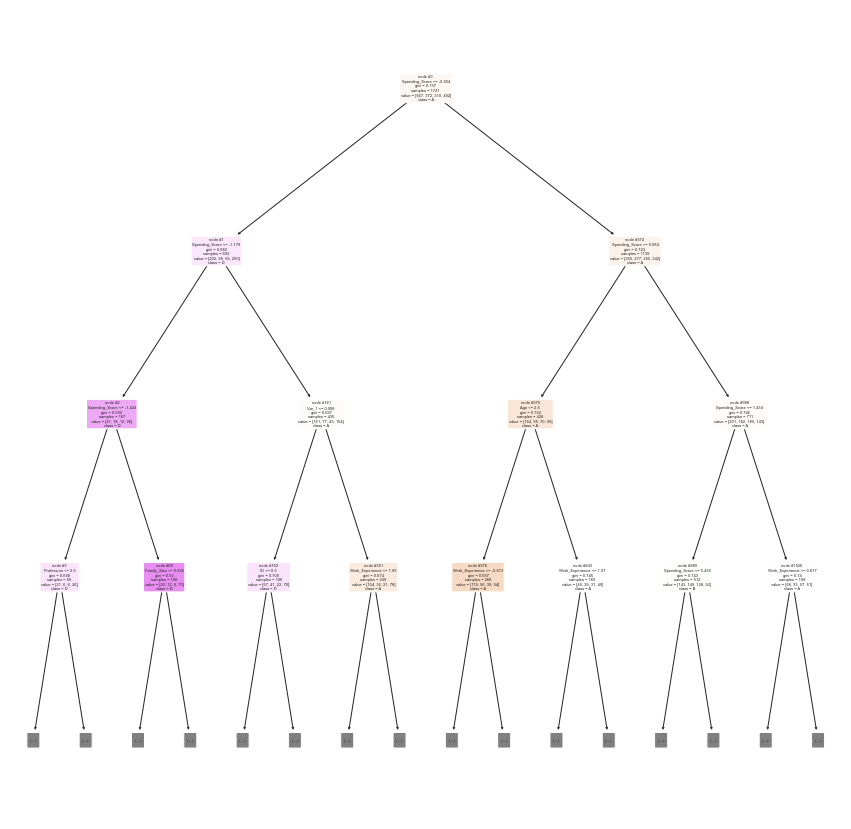

In [40]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["ID", "Gender", "Ever_Married", "Age", "Graduated", "Profession",
       "Work_Experience", "Spending_Score", "Family_Size", "Var_1"],
            class_names = ["A", "B", "C", "D"]
            )

_=plt.show()

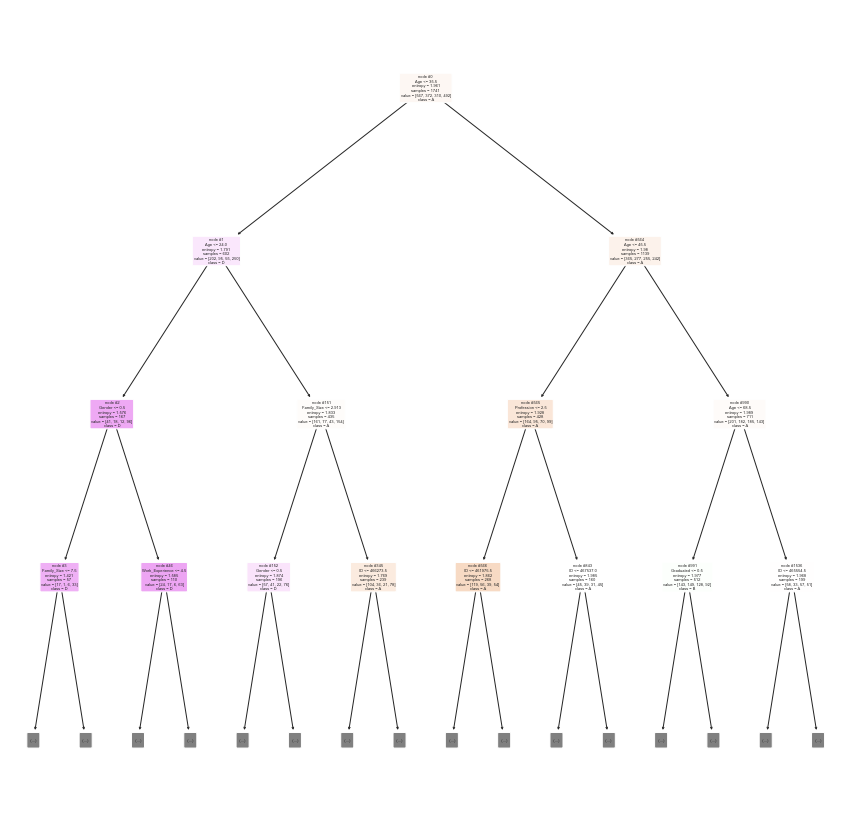

In [43]:
ct = DecisionTreeClassifier(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
           feature_names = ["ID", "Gender", "Ever_Married", "Age", "Graduated", "Profession",
       "Work_Experience", "Spending_Score", "Family_Size", "Var_1"],
            class_names = ["A", "B", "C", "D"]
            )

_=plt.show()

In [44]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.2838018741633199

In [45]:
[-33/105*np.log2(33/105) - 33/105 * np.log2(33/105) - 39/105 * np.log2(39/105) ]

[1.5803341042062597]

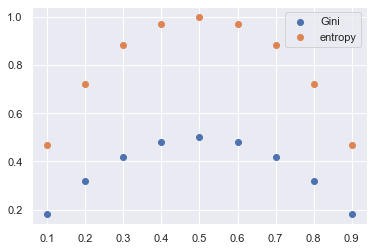

In [46]:
import matplotlib.pyplot as plt
import numpy as np
gini = []
entropy = []
i = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for p in i:
  gini.append(1 - p *p - (1-p) * (1-p))
  entropy.append( - p * np.log2(p) - (1-p) * np.log2(1-p) )
_=plt.scatter(i,gini, label = "Gini")
_=plt.scatter(i,entropy, label = "entropy")
_=plt.legend()

In [47]:
fi = ct.feature_importances_
fi

array([0.29686344, 0.03500077, 0.01327562, 0.21509862, 0.02357448,
       0.08283693, 0.1217608 , 0.0442725 , 0.09865302, 0.06866382])

In [48]:
list(zip(df.columns, fi))

[('ID', 0.2968634358478933),
 ('Gender', 0.03500077480743549),
 ('Ever_Married', 0.013275623556374093),
 ('Age', 0.21509861608699773),
 ('Graduated', 0.023574476430927884),
 ('Profession', 0.08283693330879145),
 ('Work_Experience', 0.12176080025000251),
 ('Spending_Score', 0.04427250298587676),
 ('Family_Size', 0.09865301698978919),
 ('Var_1', 0.0686638197359116)]